<a href="https://colab.research.google.com/github/KYOH95/Database_Studies/blob/main/ai_sc11x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `geo` column의 usa 와 chn 데이터만 추출하여, `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요. <br>
  **Hint** : `hue` 파라미터를 설정해 보세요. 

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
from google.colab import files
uploaded = files.upload()

In [292]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df3 = pd.read_csv("data3.csv")

In [293]:
df1.isnull().sum()

Unnamed: 0           0
geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [294]:
df2.isnull().sum()

Unnamed: 0    0
geo           0
time          0
population    0
dtype: int64

In [295]:
df3.isnull().sum()

Unnamed: 0    0
geo           0
country       0
dtype: int64

In [296]:
condition = (df1.geo == 'usa') | (df1.geo == 'chn')

df_plot = df1.loc[condition, ['geo','time', 'cell_phones_total']]

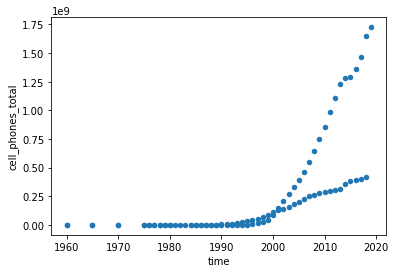

In [297]:
df_plot.plot.scatter(x = 'time', y = 'cell_phones_total');

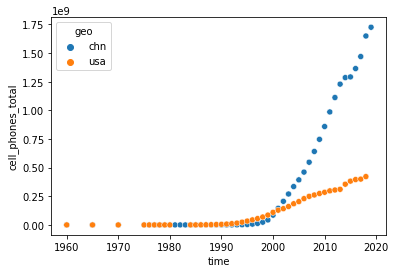

In [298]:
sns.scatterplot(data=df_plot, x="time", y="cell_phones_total", hue="geo")

### 2. Join data

- 다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|

- 2017년은 China에서 people(인구수)보다 cell phone 개수가 더 많아지는 첫 번째 해입니다. 
미국의 경우, cell phone의 개수가 people보다 더 많아지는 첫 번째 해는 언제인지 구하세요. 

In [299]:
df_join = pd.merge(df1,df2, how = 'inner', on=['geo','time'])

In [300]:
df_join = pd.merge(df_join,df3, how = 'inner', on=['geo'])

In [301]:
df_join = df_join[["geo","time","cell_phones_total","population","country"]]

In [302]:
df_join

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


In [303]:
condition = (df_join.country == "United States") & (df_join.population < df_join.cell_phones_total)
df_join[condition]
#정답 2014년

,geo,time,cell_phones_total,population,country
9033,usa,2014,355500000.0,318673411,United States
9034,usa,2015,382307000.0,320878310,United States
9035,usa,2016,396000000.0,323015995,United States
9036,usa,2017,400000000.0,325084756,United States
9037,usa,2018,422000000.0,327096265,United States


### 3. Feature Engineering
- 인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 
- geo code를 lowercase가 아닌 uppercase로 바꿔보세요. 
- 각 나라별로 평균 PPP를 계산하세요.
- 각 나라별 평균 PPP 값이 높은 순서로 정렬하세요. 다음과 비슷한 결과가 나와야 합니다. 

|country|PPP|
|:-:|:-:|
|SXM|1.899506|
|MNE|1.574349|
|NLD_CURACAO|1.259227|
|SRB|0.951586|
|ISR|0.840197|
|MAC|0.818130|
|HKG|0.810664|
|LIE|0.806225|
|SAU|0.757034|
|ARE|0.741916|

In [304]:
df_join["PPP"] = (df_join.cell_phones_total / df_join.population)
df_join

,geo,time,cell_phones_total,population,country,PPP
0,abw,1960,0.0,54211,Aruba,0.000000
1,abw,1965,0.0,57360,Aruba,0.000000
2,abw,1970,0.0,59063,Aruba,0.000000
3,abw,1975,0.0,60657,Aruba,0.000000
4,abw,1976,0.0,60586,Aruba,0.000000
...,...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe,0.923471
9564,zwe,2016,12878926.0,14030331,Zimbabwe,0.917935
9565,zwe,2017,14092104.0,14236595,Zimbabwe,0.989851
9566,zwe,2018,12908992.0,14438802,Zimbabwe,0.894049


In [305]:
df_join['geo'] = df_join['geo'].str.upper()
df_join

,geo,time,cell_phones_total,population,country,PPP
0,ABW,1960,0.0,54211,Aruba,0.000000
1,ABW,1965,0.0,57360,Aruba,0.000000
2,ABW,1970,0.0,59063,Aruba,0.000000
3,ABW,1975,0.0,60657,Aruba,0.000000
4,ABW,1976,0.0,60586,Aruba,0.000000
...,...,...,...,...,...,...
9563,ZWE,2015,12757410.0,13814629,Zimbabwe,0.923471
9564,ZWE,2016,12878926.0,14030331,Zimbabwe,0.917935
9565,ZWE,2017,14092104.0,14236595,Zimbabwe,0.989851
9566,ZWE,2018,12908992.0,14438802,Zimbabwe,0.894049


In [306]:
df_group = df_join.groupby('country').mean()

In [307]:
df_group[['PPP']].sort_values(by=['PPP'] ,ascending=False)

,PPP
country,
Sint Maarten (Dutch part),1.899506
Montenegro,1.574349
Curaçao,1.259227
Serbia,0.951586
Israel,0.840197
...,...
Northern Mariana Islands,0.048646
Marshall Islands,0.024952
Eritrea,0.024113


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [308]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


In [309]:
df.columns.values

array(['biden_cable_multiple', 'biden_online_multiple'], dtype=object)

In [310]:
# df = pd.melt(df, id_vars=['date'], value_vars=['biden_cable_multiple', 'biden_online_multiple'])

아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


In [311]:
# df.info()

In [312]:
# data_for_graph

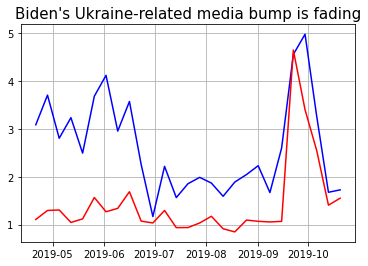

In [313]:
# data_for_graph

plt.plot(data_for_graph.index, data_for_graph.biden_cable_multiple, color='blue')
plt.plot(data_for_graph.index, data_for_graph.biden_online_multiple, color='red')

plt.title("Biden's Ukraine-related media bump is fading", fontsize=15)
# plt.ylabel('Cummulative Num', fontsize=14)
# plt.xlabel('Date', fontsize=14)
# plt.legend(fontsize=12, loc='best')
plt.grid(True)

plt.show()

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 내용을 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


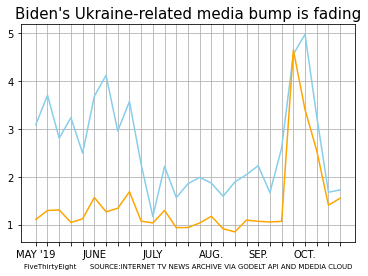

In [314]:
# data_for_graph

plt.plot(data_for_graph.index, data_for_graph.biden_cable_multiple, color='skyblue')
plt.plot(data_for_graph.index, data_for_graph.biden_online_multiple, color='orange')

values = ["MAY '19","","","","", "JUNE","","","","", "JULY","","","","", "AUG.","","","",'SEP.',"","","",'OCT.'] 

plt.title("Biden's Ukraine-related media bump is fading", fontsize=15)
# plt.ylabel('Cummulative Num', fontsize=14)
plt.xlabel('FiveThirtyEight      SOURCE:INTERNET TV NEWS ARCHIVE VIA GODELT API AND MDEDIA CLOUD', fontsize=7)
plt.xticks(data_for_graph.index,values)
# plt.legend(fontsize=12, loc='best')
plt.grid(True)

plt.show()